## Tests description:

In all files input data from Arduino/temperature_test measurements. 
Thus, we have temperature measurements with 1 minute step in reversed in time array. 
If array ends with sequence of zeros, that means, we didn't obtain hour of measurements, 
and last non-zero measurement is the beginning.

Conventions: 
TMT | Temperature Measurement Tool - consists of arduino nano (PB-04) connected to temp sensor (PB-01) and 9v battery.


test1.txt : We put TMT into thermos, thermos into usual freezer 
            at Skoltech 1st floor kitchen (close to Robotics lab).

test2.txt : We put TMT into thermos, thermos into usual fridge (same location).

test3.txt : We put TMT into thermos, thermos into room conditions (see first measurements on plot)

test4.txt : We put TMT into transparent polyethilene bag, without thermos, in fridge.

test5.txt : We put TMT with additional 50 Ohm resistor connected to battery, simulating extra heating
            in thermos, freezer (same as for test1.txt).

test6.txt : We put TMT with additional 200 Ohm resistor connected to battery, simulating RPi Zero heating
            in thermos, freezer (same as for test1.txt)

test7.txt : Measuring real temperature inside freezer, which used for tests (1,5,6). 
            We put TMT in transparent polyethilene bag 
            and than to freezer for almost an hour.


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
def plot_test(test_number):
    fig,ax = plt.subplots(figsize=(7,3),dpi=600)
    test_data = np.loadtxt("test"+str(test_number)+".txt")
    test_data = np.flip(test_data,0)
    first_non_zero = (test_data != 0).argmax()
    test_data = test_data[first_non_zero:]
    time_list = list(range(test_data.shape[0]))
    ax.plot(time_list, test_data)
    ax.grid()
    ax.set_xlabel('Time, minutes')
    ax.set_ylabel('Temperature, °C')
    ax.set_title('Test %d'%(test_number))
    plt.savefig("test"+str(test_number)+".pdf", bbox_inches='tight')

Test 1. Temperature falls - OK, good.

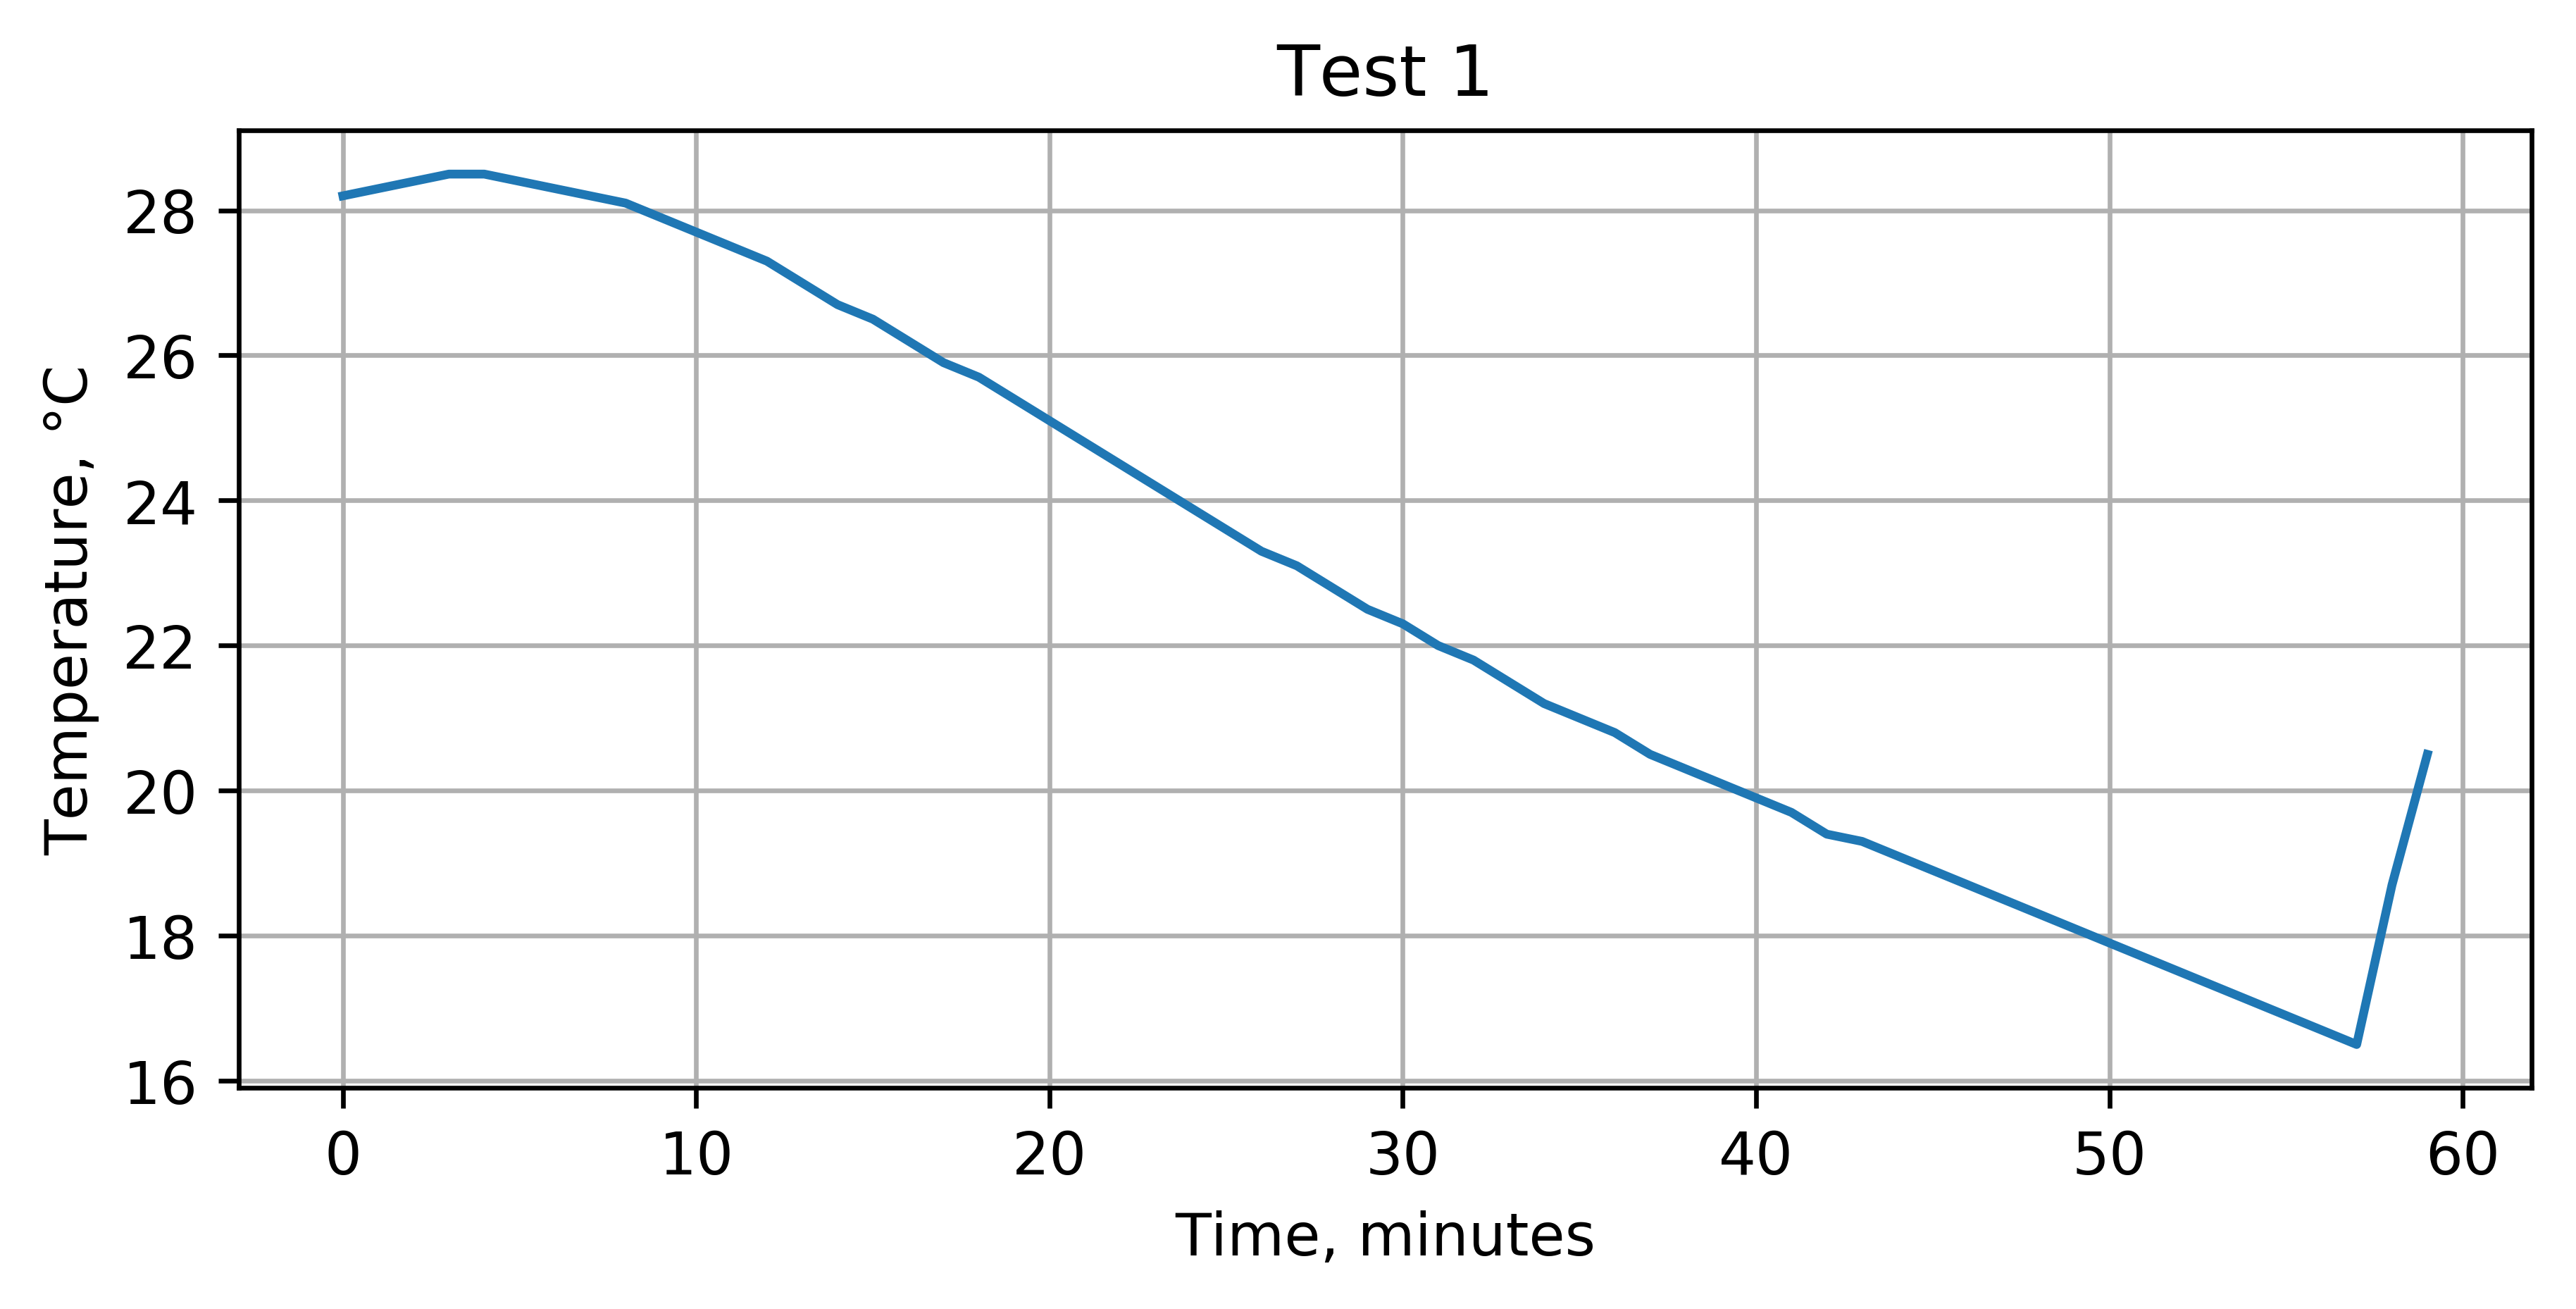

In [16]:
plot_test(1)

Test 2. Temperature is stable or decreasing very slowly.

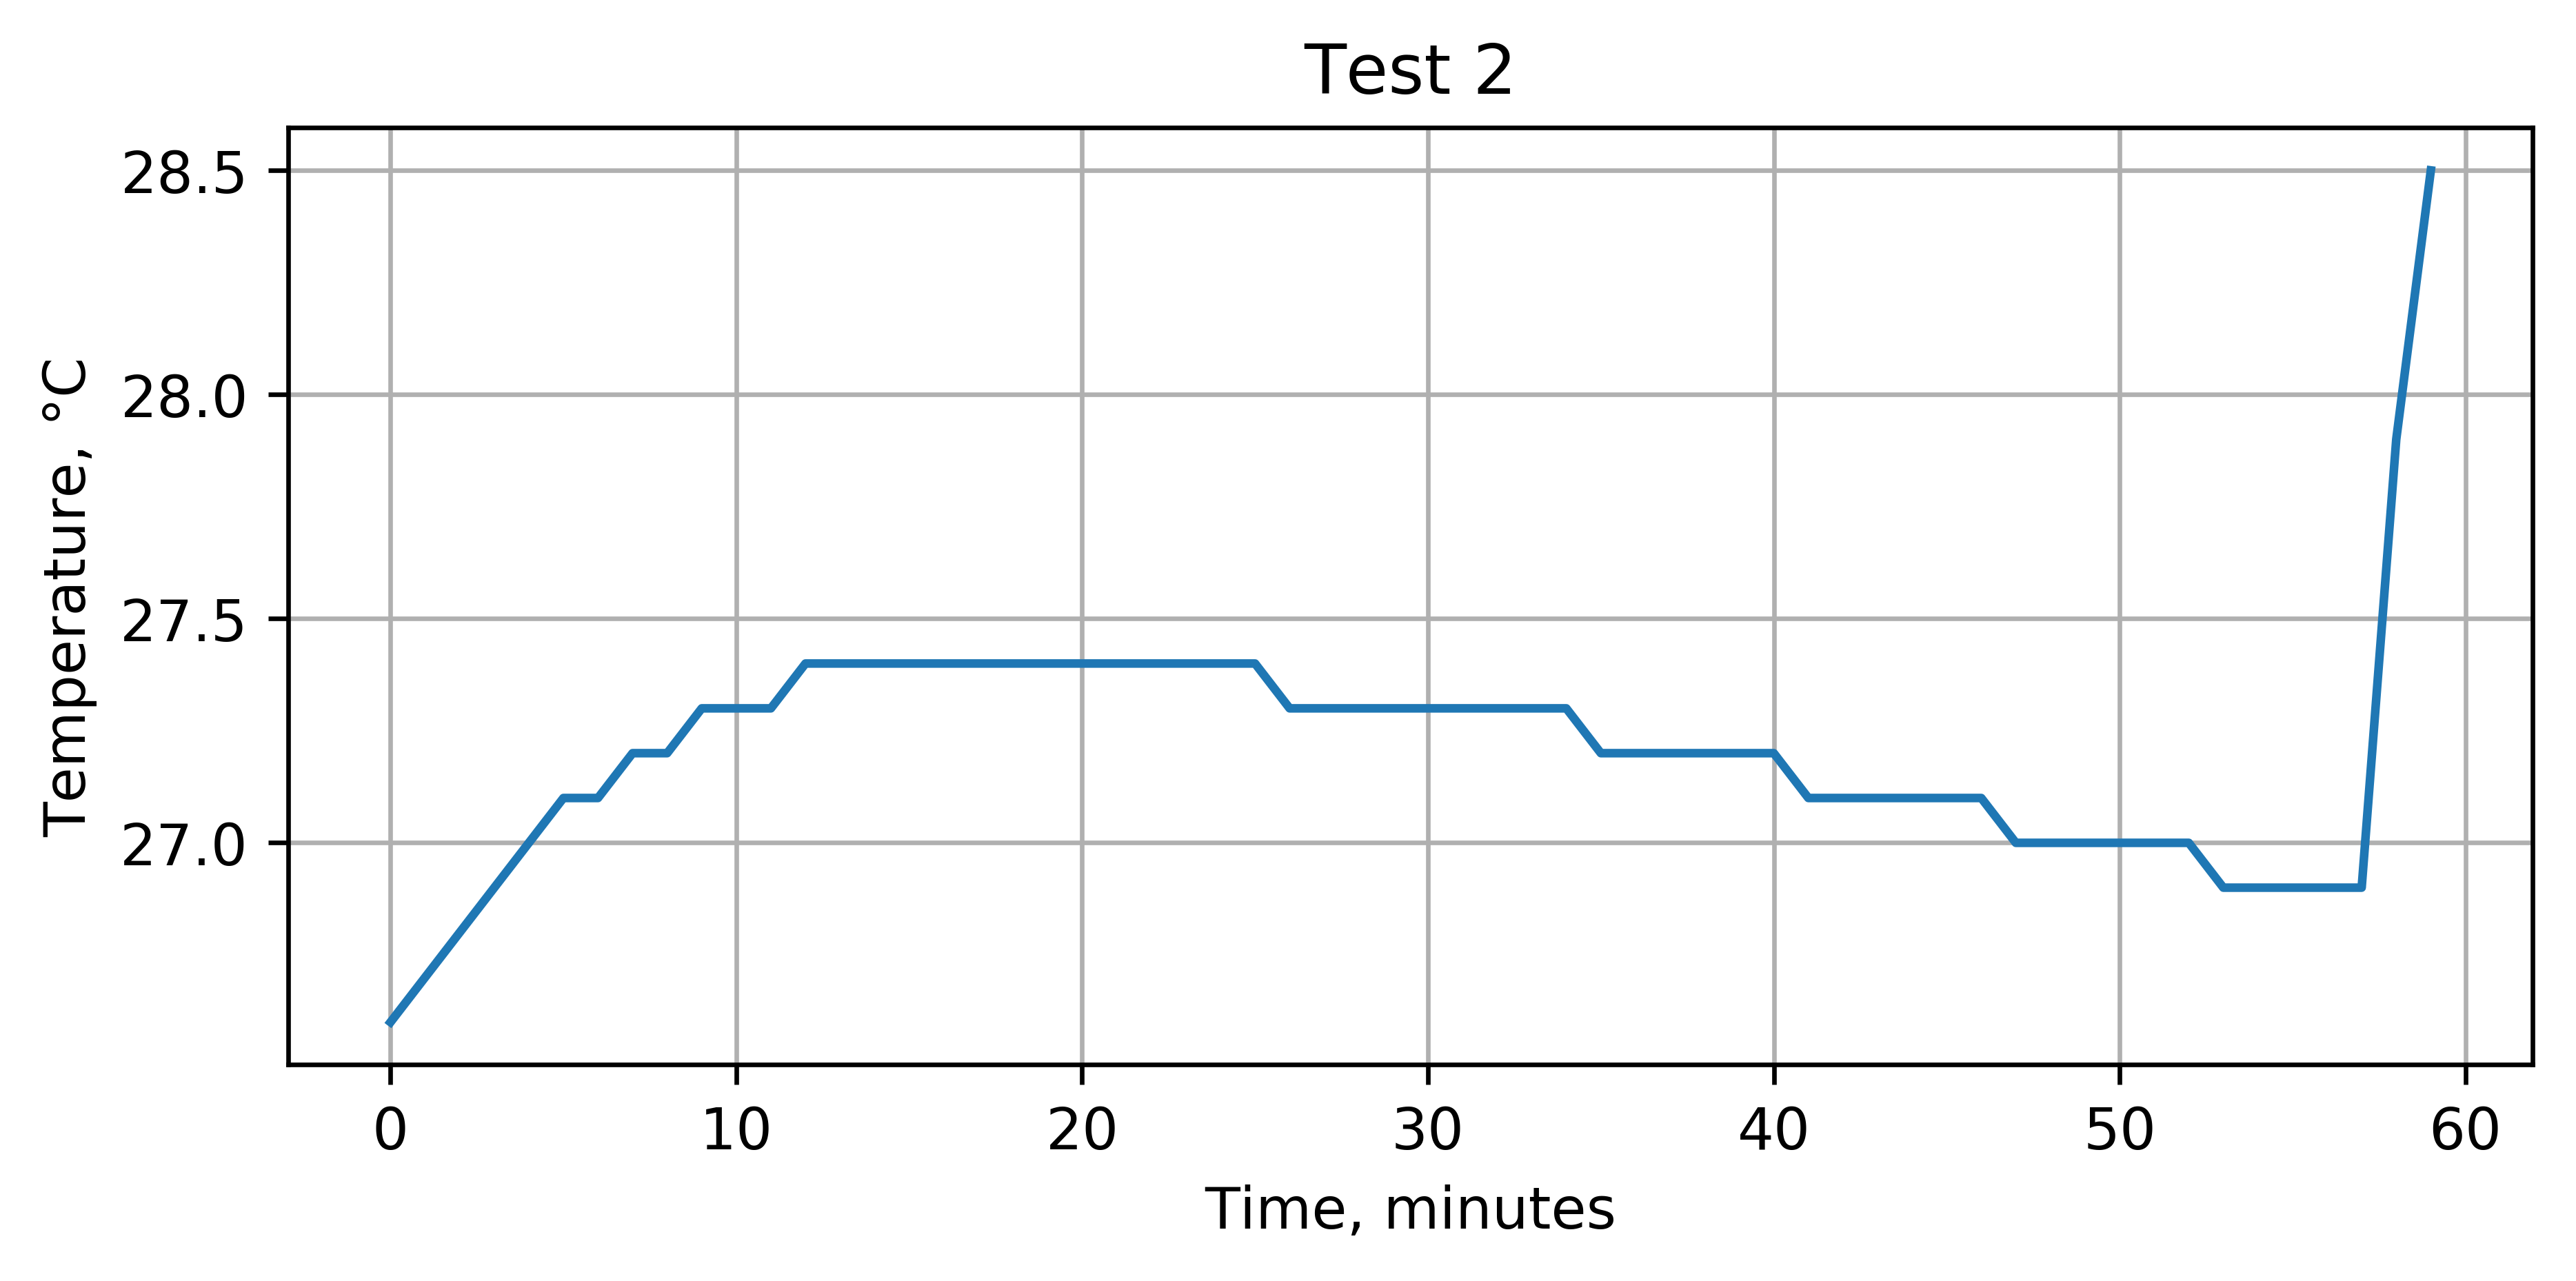

In [17]:
plot_test(2)

Test 4.
We put in fridge from 30 to 55 minutes on plot, and it's temperature slowly decreased.

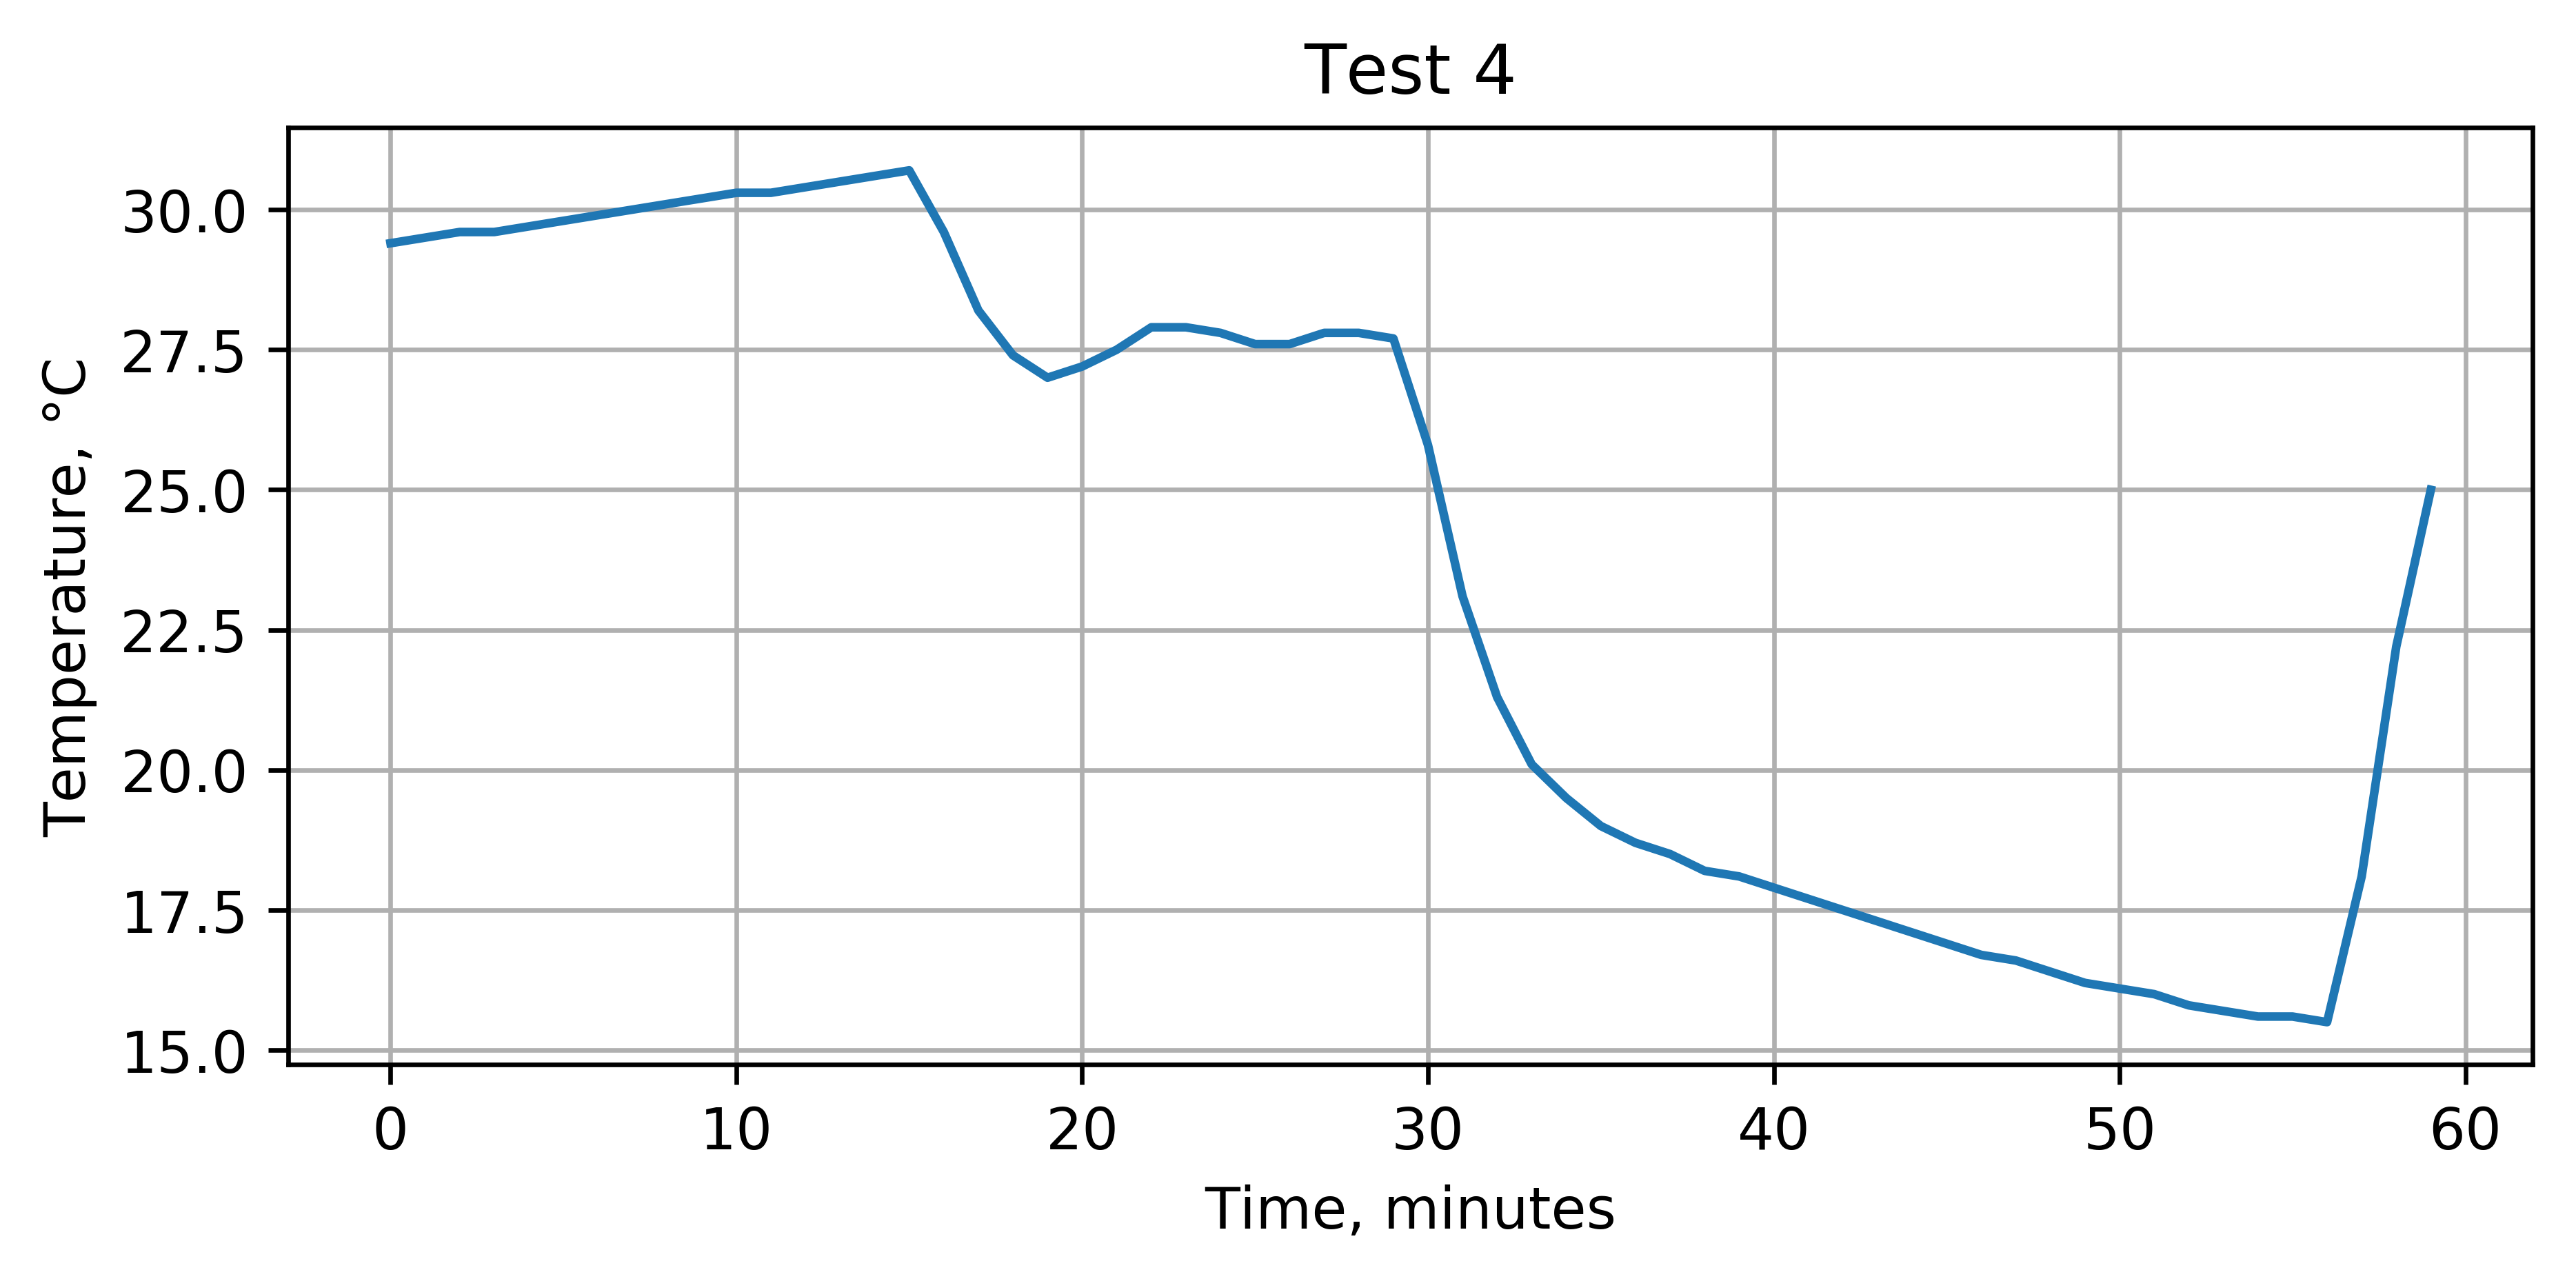

In [23]:

plot_test(4)

Test 5.
50 Ohm resistor to 9V leads to overheating -> can be used as heating resistor.

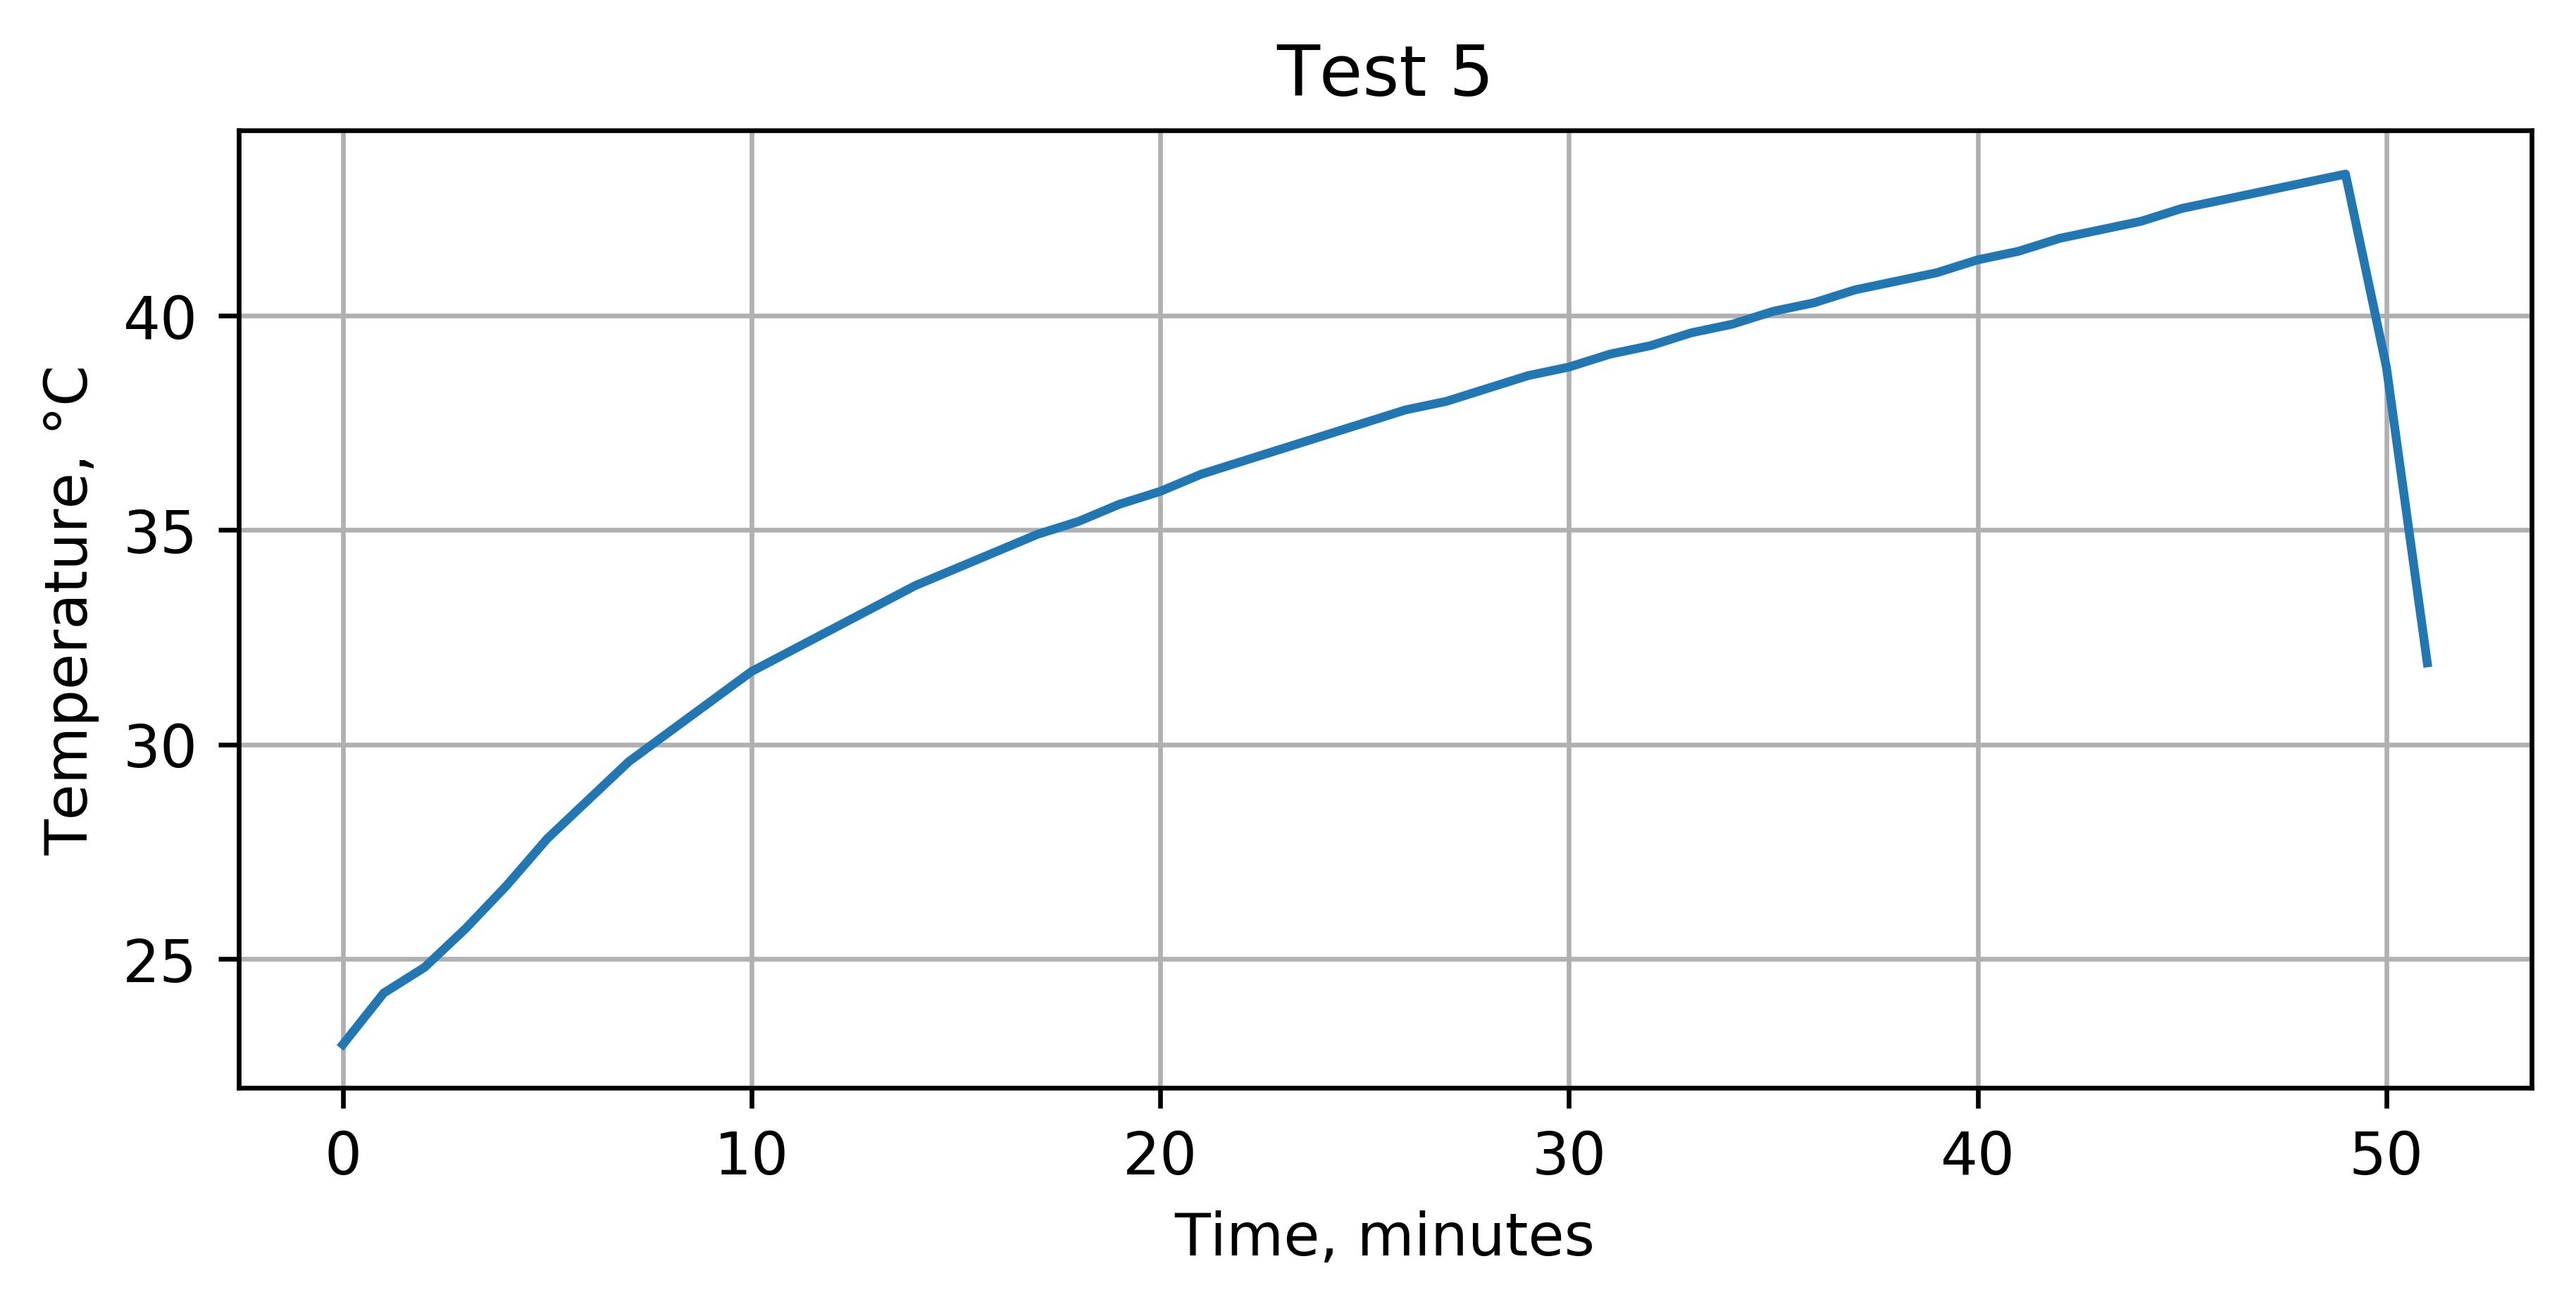

In [24]:
plot_test(5)

Test 6.
With additional heating comparable to RPi Zero it's still cooling down.
Worth notice, that's speed in terms of °C/minute is just twice as small as without RPi Zero.

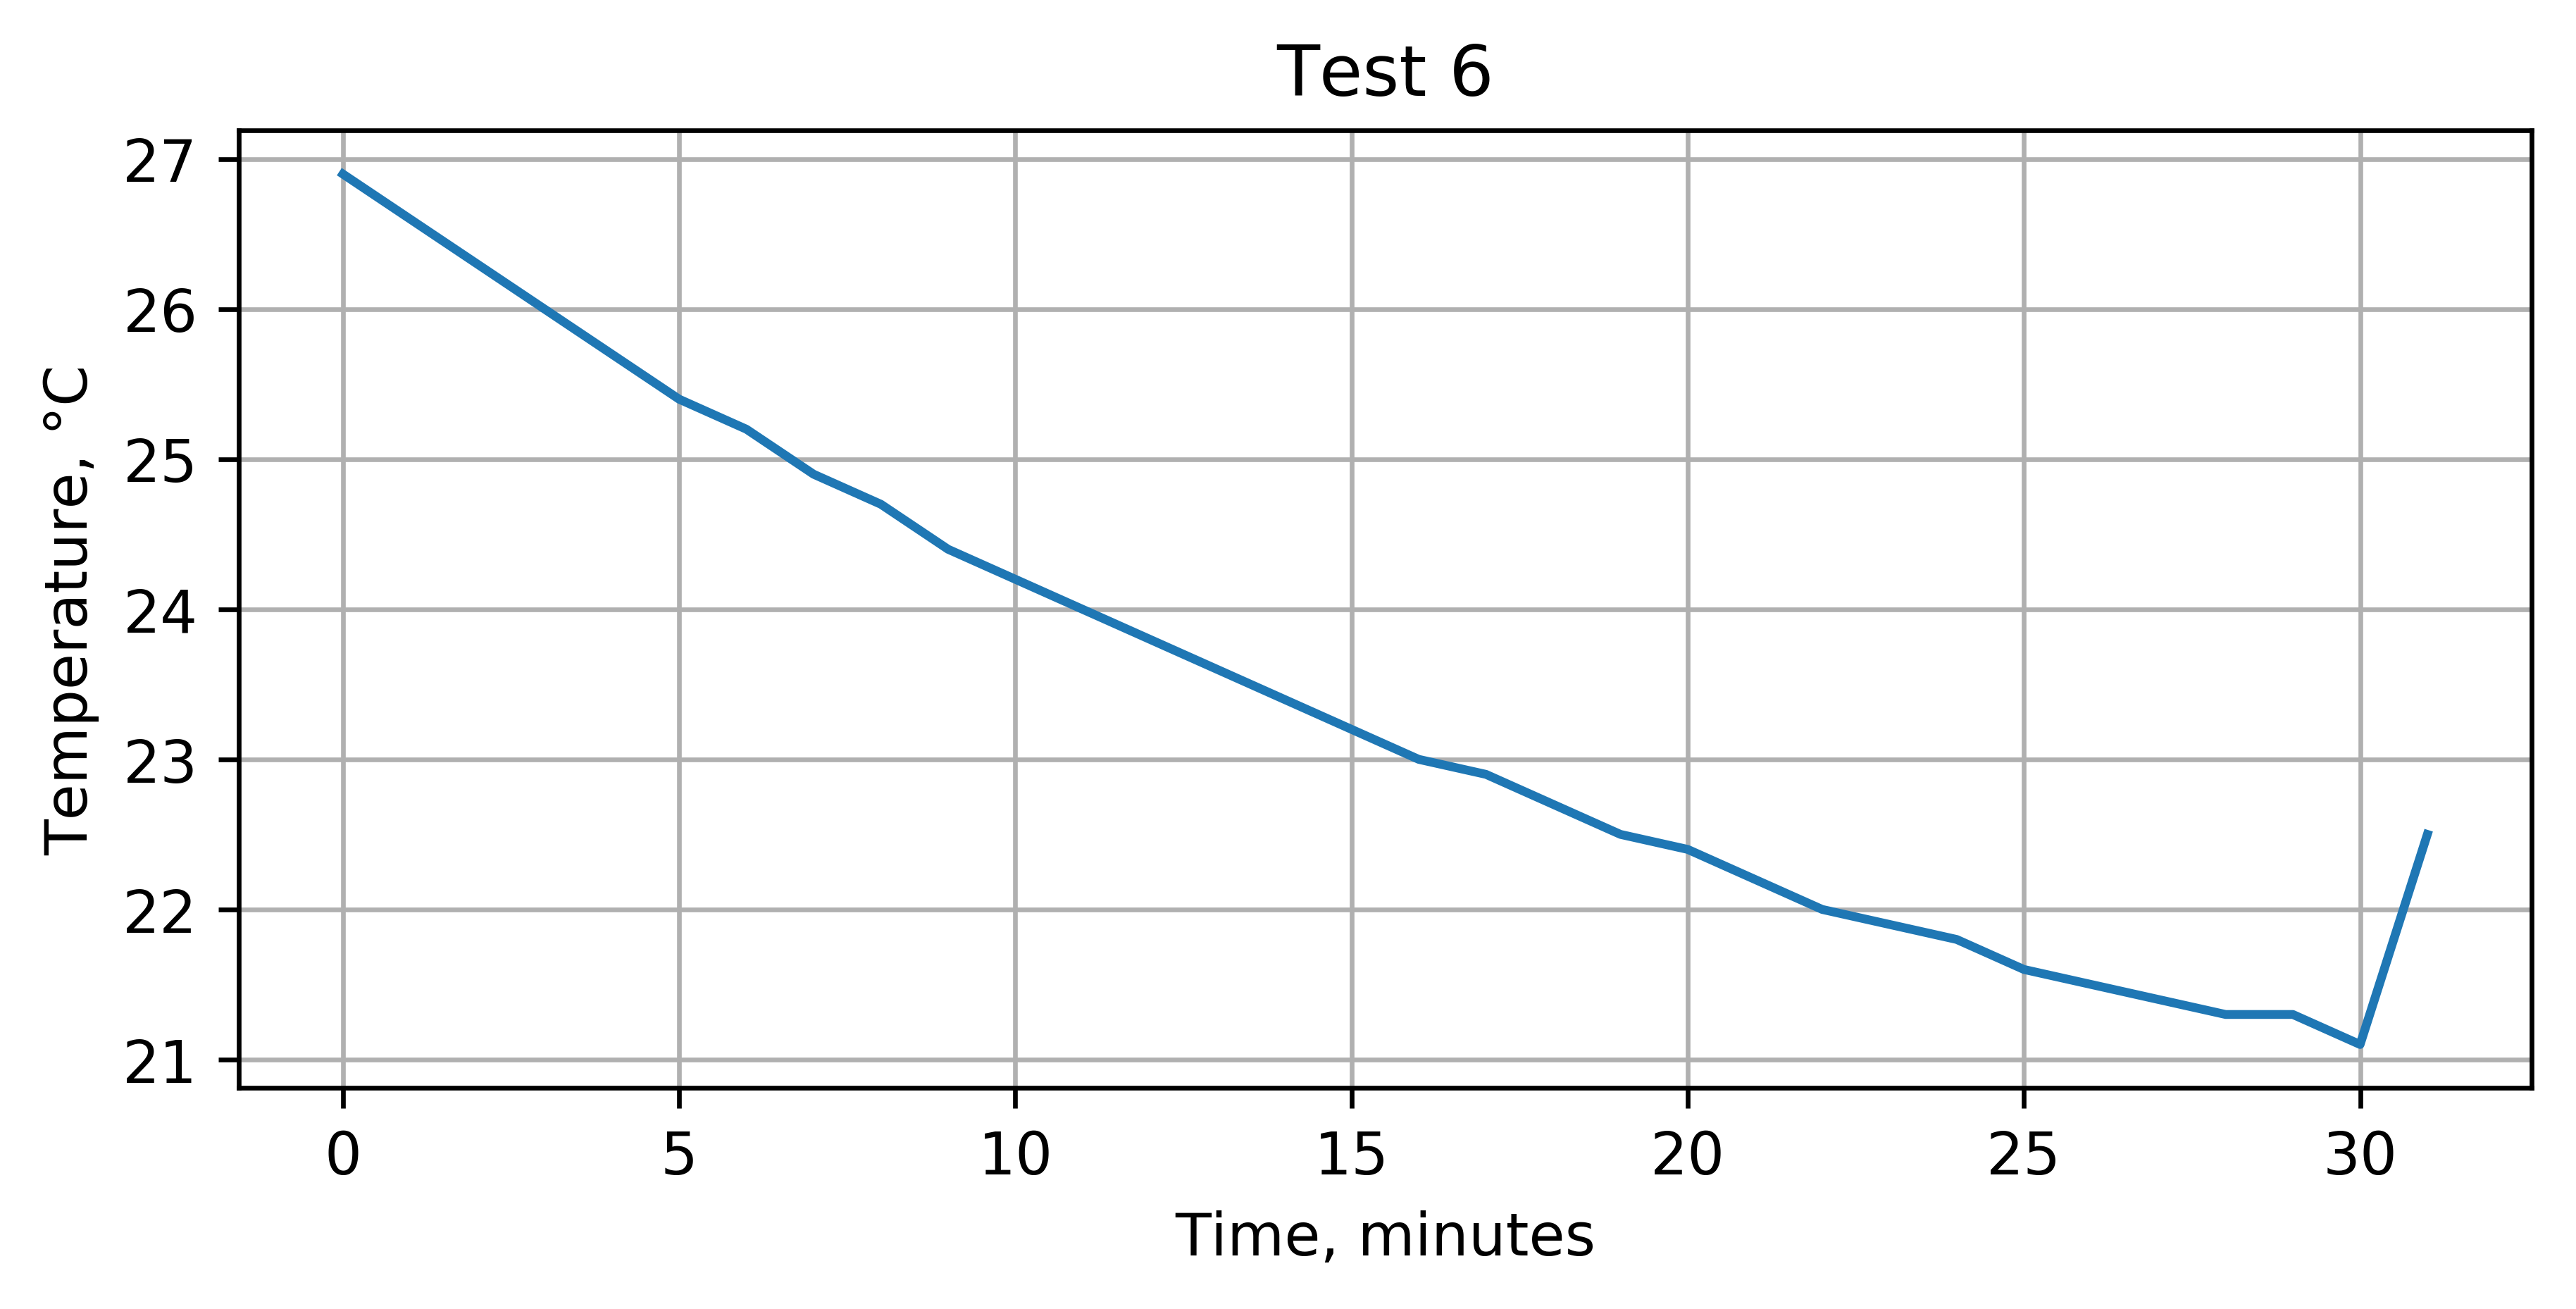

In [25]:
plot_test(6)

Test 7.
We see here that cooling cycle of freezer is about from -20 to -15.

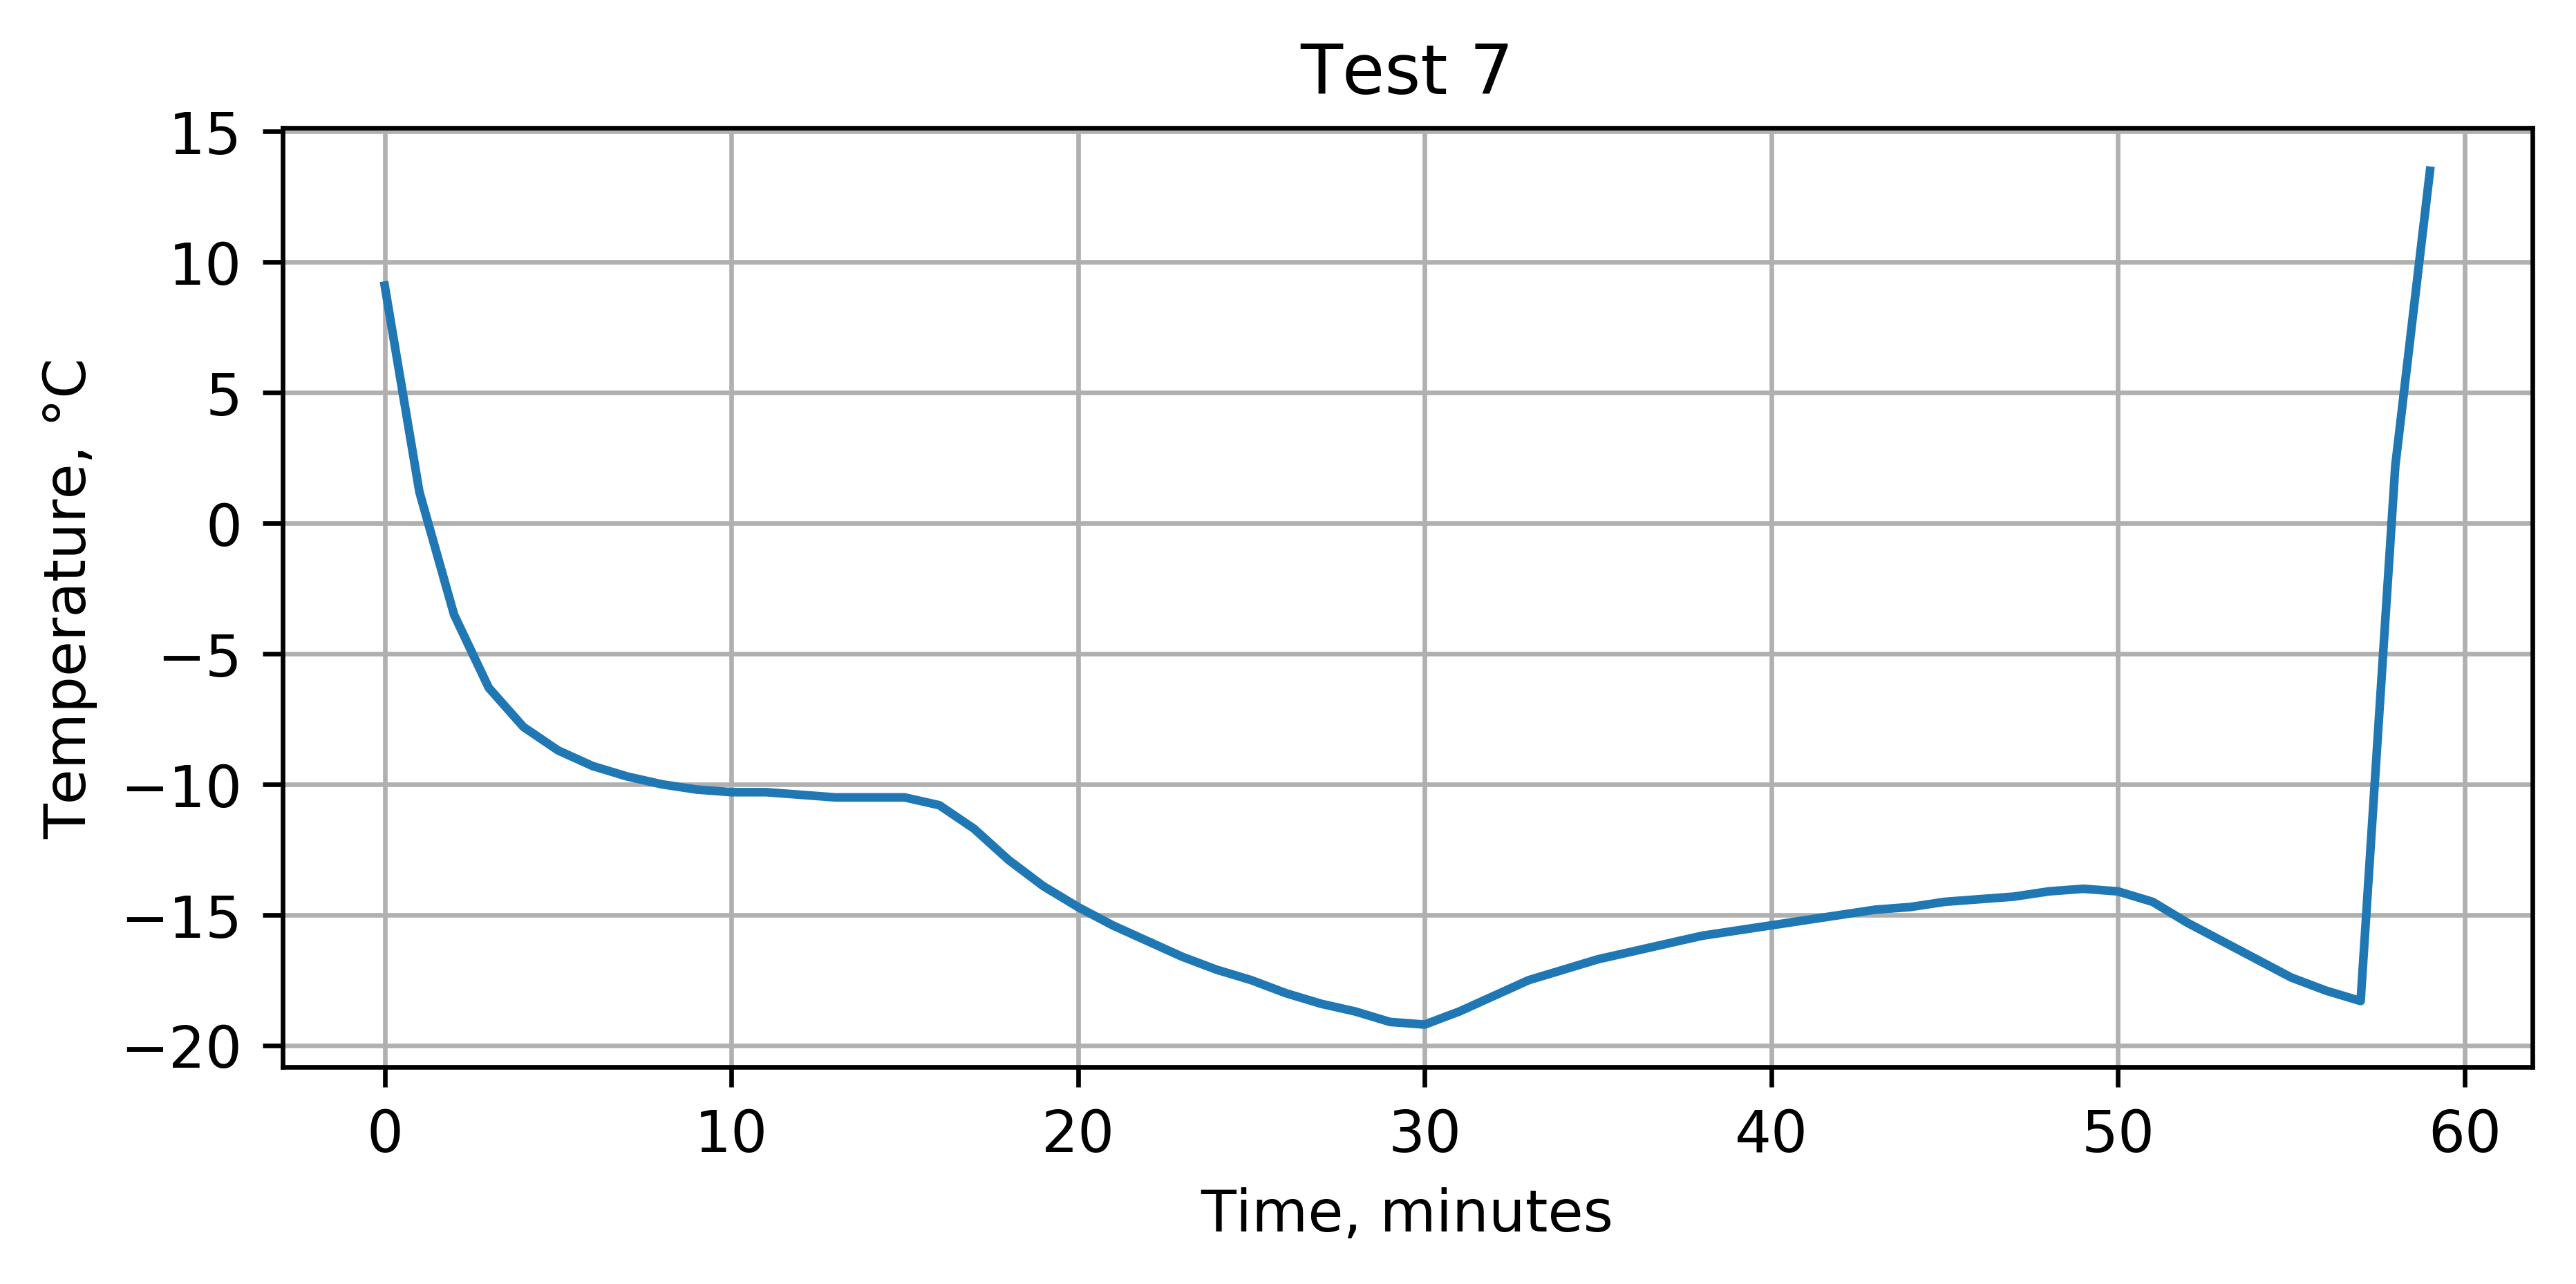

In [27]:
plot_test(7)